<a href="https://colab.research.google.com/github/Kadeian/reimagined-octo-disco/blob/master/Employee_Promotion_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Employee Promotion Prediction
**Author:** Jaysen Lamb  
**Date:** May 6, 2024

# Employee Promotion Prediction Project

## Problem Statement
In the corporate world, employee promotion is a key driver of motivation and retention. The HR team at JMD Company is responsible for managing promotions based on employee ratings and other attributes. However, due to the vast amount of information available for each employee, the process often gets delayed.

The HR team has stored data on the promotion cycle from last year, including details of all employees in the company and whether they were promoted. They want to leverage machine learning to predict if a person is eligible for promotion or not in the upcoming appraisal cycle.

## Objective
As a data scientist at JMD Company, your goal is to build a machine learning model that will predict if an employee is eligible for promotion based on the available data. This will help the HR team streamline the promotion process.

## Data Description
The dataset contains the following features:

- **employee_id**: Unique ID for the employee
- **department**: Department of the employee
- **region**: Region of employment (unordered)
- **education**: Education Level
- **gender**: Gender of the employee
- **recruitment_channel**: Channel of recruitment for the employee
- **no_of_trainings**: Number of other training completed in the previous year (soft skills, technical skills, etc.)
- **age**: Age of the employee
- **previous_year_rating**: Employee Rating for the previous year
- **length_of_service**: Length of service in years
- **awards_won**: If awards were won during the previous year (1 if yes, 0 otherwise)
- **avg_training_score**: Average score in current training evaluations
- **is_promoted**: (Target) Recommended for promotion (1 if yes, 0 otherwise)

#1. Importing Libraries
Before diving into the analysis, it's crucial to import necessary Python libraries:

- **Pandas**: For data manipulation and retrieval.
- **NumPy**: For efficient numerical computation.
- **Matplotlib and Seaborn**: For data visualization.
- **sklearn (scikit-learn)**: For preprocessing, splitting datasets, and model evaluation.
- **imbalanced-learn (SMOTE)**: For balancing dataset classes.
- **xgboost**: For building gradient boosting models.

```python
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb


In [ ]:
# Installing required libraries using Google Colab
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Set seaborn style for plots
sns.set_theme(style="whitegrid")


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/employee_promotion.csv")

In [ ]:
print(df.head)

<bound method NDFrame.head of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  a

## Loading the Dataset

The dataset is loaded into a DataFrame using Pandas. This step is crucial as it forms the basis of all further analyses and model building.

df = pd.read_csv ('//content/drive/MyDrive/Colab Notebooks/employee_promotion.csv)

## Initial Examination of the Dataset

After successfully loading the dataset into a DataFrame, the next steps involve performing an initial examination to verify the data's integrity and to gain a foundational understanding of its characteristics. This phase is critical for identifying any potential issues that need addressing before moving into more detailed exploratory data analysis and modeling.

### Display the First Few Rows

Viewing the first few rows of the dataset provides a quick check to ensure the data has loaded correctly and to familiarize ourselves with the data structure and content:


#2. Loading and Exploring the Dataset
Load the dataset and have a quick look at its structure.

In [ ]:
# Load the dataset (assuming it's a CSV)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/employee_promotion.csv')

# Overview of the dataset
print(data.head())
print(data.info())
print(data.describe())


   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  awards_won  avg_training_score  is_promoted  
0                  8           0                49.0            0  
1         

## Initial Examination of the Dataset

After successfully loading the dataset into a DataFrame, the next steps involve performing an initial examination to verify the data's integrity and to gain a foundational understanding of its characteristics. This phase is critical for identifying any potential issues that need addressing before moving into more detailed exploratory data analysis and modeling.

### Display the First Few Rows

Viewing the first few rows of the dataset provides a quick check to ensure the data has loaded correctly and to familiarize ourselves with the data structure and content:


# Employee Promotion Prediction Project

## Detailed Observations
- **Department Distribution:** Employees belong to various departments, including Sales & Marketing, Operations, and Technology.
  - **Sales & Marketing** appears the most frequently, indicating that this department may have a significant impact on overall promotion trends.
  
- **Regional Diversity:** The dataset includes employees from several regions like region_7, region_22, and region_26.
  - **region_7** has the highest representation among the previewed entries, while other regions, such as region_22 and region_26, are also prominent.

- **Education Background:** The dataset captures different educational levels, such as "Master's & above" and "Bachelor's."
  - The **Bachelor's** level is the most prevalent education category.
  - Missing values in education (~4.4%) need to be handled carefully.

- **Previous Year Rating:** Ranges from 1.0 to 5.0, indicating a grading system for employees' past performance.
  - A **previous_year_rating** of 3.0 and above is relatively common, hinting at overall good performance.
  - However, there are missing values (~7.5% of the total dataset) that require proper handling.

- **Length of Service Variability:** The length of service ranges from 1 to 37 years, revealing a diverse workforce with varying degrees of experience.
  - Employees with a **length_of_service** of fewer than 10 years form the majority, indicating a workforce dominated by relatively new hires.

- **Awards Won:** A binary indicator (`awards_won`) for awards won in the previous year (1 if yes, 0 otherwise).
  - Most employees have not won awards, as indicated by the low prevalence of 1s.
  - Winning awards may provide a useful signal for promotion prediction.

- **Training Programs:**
  - **Number of Trainings:** Ranges from 1 to 10, highlighting different levels of engagement in training programs.
    - Most employees have completed only one training.
  - **Average Training Score:** Varies from 39 to 99, providing a metric to gauge employee training performance.
    - Scores below 60 might suggest improvement areas.

- **Gender Distribution:** The dataset includes employees of both genders, `male` and `female`.
  - There is a slight male dominance in the previewed entries.

- **Target Variable - is_promoted:**
  - Only around **8.5%** of employees were promoted in the previous cycle, making the dataset highly imbalanced.
  - This imbalance will require oversampling or undersampling techniques to create a balanced dataset.

- **Potential Outliers:**
  - Some employees have a **0 value** for awards won and a low number of trainings, which might indicate a lack of engagement or recognition.
  - Employees with a high number of trainings and high average training scores might have a greater chance of promotion.

These observations provide a preliminary understanding of the dataset and identify areas for further exploration. Addressing missing values, handling imbalanced data, and understanding correlations will be crucial to building an effective predictive model.



### Checking Dataset Information with `df.info()`

To understand the structure of our dataset better, we use the `df.info()` method. This method provides a concise summary of the DataFrame, offering insights into the total number of entries, the type of each column, and most importantly, the number of non-null entries per column. This information is invaluable as it helps us quickly identify if any columns contain missing values and the data type of each column, which is crucial for planning subsequent data preprocessing tasks like handling missing values or converting data types:

```python
df.info()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


# Employee Promotion Prediction Project

## Detailed Observations
- **Total Rows and Columns:** The dataset contains **54,808** entries and **13** columns.

- **Data Types:**
  - **Numerical (8 columns):** `employee_id`, `no_of_trainings`, `age`, `previous_year_rating`, `length_of_service`, `awards_won`, `avg_training_score`, `is_promoted`
  - **Categorical (5 columns):** `department`, `region`, `education`, `gender`, `recruitment_channel`

- **Missing Values:**
  - **education:** 24,09 missing entries (~4.4% of total data)
  - **previous_year_rating:** 4,124 missing entries (~7.5% of total data)
  - **avg_training_score:** 2,560 missing entries (~4.7% of total data)

- **Memory Usage:** Approximately **5.4+ MB**.

### Column-Specific Observations:
1. **department (Categorical):**
   - Multiple departments, such as Sales & Marketing, Operations, and Technology.
   - Likely to influence promotion trends.

2. **region (Categorical):**
   - Several regions represented, with some potentially influencing promotion trends.

3. **education (Categorical, Missing Values):**
   - Various education levels, including "Master's & above" and "Bachelor's."
   - Missing values (~4.4%) need to be addressed.

4. **gender (Categorical):**
   - Binary gender classification (`m` for male, `f` for female).

5. **recruitment_channel (Categorical):**
   - Different channels like `sourcing`, `other`, and `referral`.

6. **no_of_trainings (Numerical):**
   - Ranges from 1 to 10.
   - Indicates varying levels of training engagement.

7. **age (Numerical):**
   - Ranges from 20 to 60 years.
   - Provides insights into the age distribution of employees.

8. **previous_year_rating (Numerical, Missing Values):**
   - Ranges from 1.0 to 5.0.
   - Grading system for past performance.
   - Missing values (~7.5%) require handling.

9. **length_of_service (Numerical):**
   - Ranges from 1 to 37 years.
   - Offers insights into employee loyalty.

10. **awards_won (Binary Numerical):**
    - Indicates whether an employee won awards in the previous year (1 if yes, 0 if no).

11. **avg_training_score (Numerical, Missing Values):**
    - Varies from 39.0 to 99.0.
    - Indicates performance in training programs.
    - Missing values (~4.7%) need to be handled.

12. **is_promoted (Binary Target Variable):**
    - Promotion status (1 if promoted, 0 if not promoted).
    - Imbalanced target distribution with only around 8.5% promotions.



### Sanity Check Observations:
- **Missing Values:**
  - **education:** 2,409 missing entries (~4.4% of total data)
  - **previous_year_rating:** 4,124 missing entries (~7.5% of total data)
  - **avg_training_score:** 2,560 missing entries (~4.7% of total data)

- **Unique Values:**
  - **department:** 9 unique departments
  - **region:** 34 unique regions
  - **education:** 3 unique education levels
  - **recruitment_channel:** 3 unique channels

- **Target Variable Distribution (Imbalance):**
  - Only about **8.5%** of employees were promoted in the last cycle, indicating a significant class imbalance.


### Handling Missing Values

Before proceeding with detailed exploratory data analysis, it's crucial to address any missing values in the dataset. Missing values can adversely affect the quality of analysis and modeling results if not handled properly. In this section, we will:

1. Identify columns with missing values and assess the extent of missingness.
2. Decide on an appropriate strategy for handling missing values, such as imputation, deletion, or treating missingness as a separate category.
3. Implement the chosen strategy to clean the data and ensure that it is ready for further analysis.


In [ ]:
# Handling Missing Values
# Identify columns with missing values
missing_values = df.isnull().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Decide on an appropriate strategy for handling missing values
# For numeric columns, we can impute missing values with the mean or median
# For categorical columns, we can impute missing values with the mode or a new category

# Example: Impute missing values in the 'education' column with the mode
mode_education = df['education'].mode()[0]
df['education'].fillna(mode_education, inplace=True)

# Impute missing values in the 'previous_year_rating' column with the median
median_previous_year_rating = df['previous_year_rating'].median()
df['previous_year_rating'].fillna(median_previous_year_rating, inplace=True)

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(df.isnull().sum())

# Data is now ready for further analysis


Columns with missing values:
education               2409
previous_year_rating    4124
avg_training_score      2560
dtype: int64

Missing values after handling:
employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64


### Handling Missing Values in 'avg_training_score' Column

We have chosen to impute missing values in the 'avg_training_score' column with the median for the following reasons:

1. **Robustness to Outliers**: The median is less sensitive to outliers compared to the mean. Since the presence of outliers can skew the distribution of the 'avg_training_score' column, using the median will provide a more robust estimate of the central tendency.

2. **Distribution Consideration**: Without prior knowledge of the distribution of 'avg_training_score', it's safer to use the median, which is a more reliable measure of central tendency for skewed or non-normally distributed data.

3. **Preservation of Data Structure**: Imputing missing values with the median ensures that the overall structure and characteristics of the data are preserved, minimizing potential biases introduced by imputing with other measures.

Overall, using the median for imputation strikes a balance between robustness and reliability, making it a suitable choice for handling missing values in this context.


In [ ]:
# Impute missing values in the 'avg_training_score' column with the median
median_avg_training_score = df['avg_training_score'].median()
df['avg_training_score'].fillna(median_avg_training_score, inplace=True)

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64


## Exploratory Data Analysis (EDA)

EDA is an important part of any project involving data. It's essential to investigate and understand the data better before building a model. Below are some key questions to guide the analysis and generate insights from the data:

### Key Questions:
1. How is the distribution of the average training score of employees?
2. How is the distribution of the age of employees?
3. How does the change in length of service vary by the employee's promotion status (is_promoted)?
4. How does the previous rating vary by the employee's promotion status (is_promoted)?
5. What are the attributes that have a strong correlation with each other?

### EDA Functions

```python
# Function to create labeled bar plots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])
    count = data[feature].nunique()
    plt.figure(figsize=(count + 1, 5) if n is None else (n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())
    for p in ax.patches:
        label = "{:.1f}%".format(100 * p.get_height() / total) if perc else p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")
    plt.show()

# Function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sortValues(by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Function to plot distributions with respect to the target
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(data=data[data[target] == target_uniq[0]], x=predictor, kde=True, ax=axs[0, 0], color="teal")
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(data=data[data[target] == target_uniq[1]], x=predictor, kde=True, ax=axs[0, 1], color="orange")
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 1]. set_title("Boxplot (without outliers) w.r.t


In [ ]:
# Function to create labeled bar plots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])
    count = data[feature].nunique()
    plt.figure(figsize=(count + 1, 5) if n is None else (n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())
    for p in ax.patches:
        label = "{:.1f}%".format(100 * p.get_height() / total) if perc else p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")
    plt.show()

# Function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Function to plot distributions with respect to the target
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(data=data[data[target] == target_uniq[0]], x=predictor, kde=True, ax=axs[0, 0], color="teal")
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(data=data[data[target] == target_uniq[1]], x=predictor, kde=True, ax=axs[0, 1], color="orange")
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, palette="gist_rainbow")
    plt.tight_layout()
    plt.show()


In [ ]:
# Displaying the first few rows of the dataset
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


### Question 1: How is the distribution of average training score of employees?

To answer this question, we will:

1. Plot a histogram to visualize the distribution of average training scores.
2. Optionally, we can calculate summary statistics such as mean, median, and standard deviation to further understand the distribution.


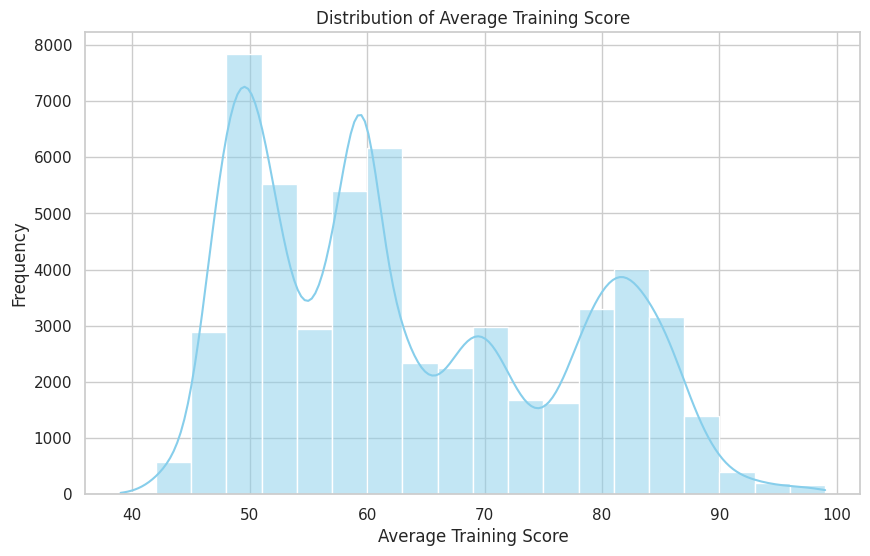

In [ ]:
# Plotting a histogram to visualize the distribution of average training scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_training_score', kde=True, bins=20, color='skyblue')
plt.title('Distribution of Average Training Score')
plt.xlabel('Average Training Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Question 2: How is the distribution of age of employees?

To answer this question, we will:

1. Plot a histogram to visualize the distribution of employee ages.
2. Optionally, we can calculate summary statistics such as mean, median, and standard deviation to further understand the distribution.


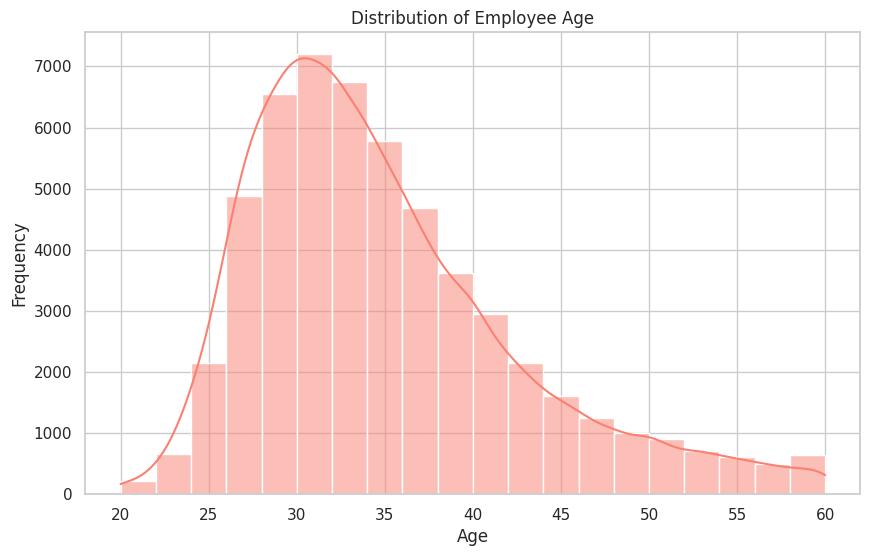

In [ ]:
# Plotting a histogram to visualize the distribution of employee ages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=20, color='salmon')
plt.title('Distribution of Employee Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Question 3: How does the change in length of service vary by the employee's promotion status (is_promoted)?

To answer this question, we will:
1. Group the data by the 'is_promoted' variable to separate promoted and non-promoted employees.
2. Calculate summary statistics (mean, median, etc.) for the 'length_of_service' variable within each group to understand the central tendency.
3. Visualize the distribution of length of service for promoted and non-promoted employees using appropriate plots, such as boxplots or histograms.
4. Interpret the results to determine if there is a significant difference in the length of service between promoted and non-promoted employees.


In [ ]:
# Grouping the data by 'is_promoted' variable
grouped_promotion = df.groupby('is_promoted')

# Displaying summary statistics for 'length_of_service' within each group
summary_statistics = grouped_promotion['length_of_service'].describe()
print(summary_statistics)


               count      mean       std  min  25%  50%  75%   max
is_promoted                                                       
0            50140.0  5.879398  4.288039  1.0  3.0  5.0  7.0  37.0
1             4668.0  5.716367  4.007772  1.0  3.0  5.0  7.0  34.0


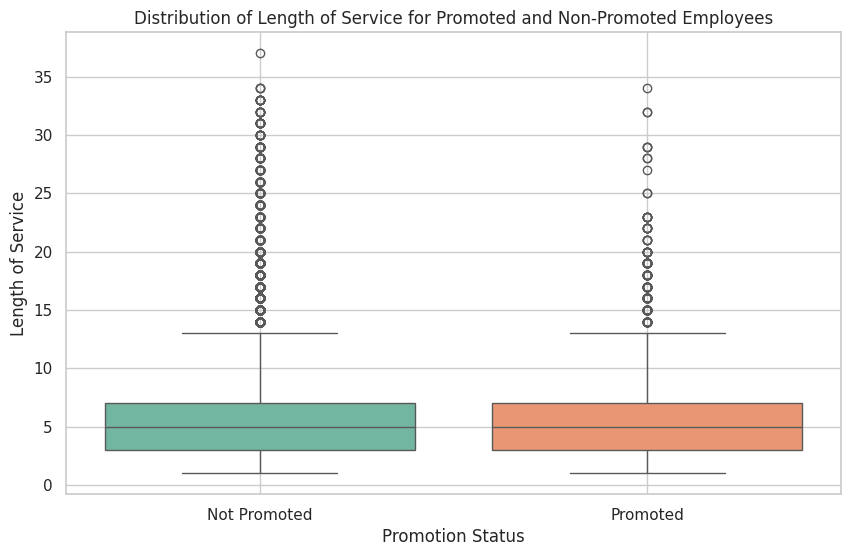

In [ ]:
# Visualizing the distribution of length of service for promoted and non-promoted employees using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_promoted', y='length_of_service', palette='Set2')
plt.title('Distribution of Length of Service for Promoted and Non-Promoted Employees')
plt.xlabel('Promotion Status')
plt.ylabel('Length of Service')
plt.xticks(ticks=[0, 1], labels=['Not Promoted', 'Promoted'])
plt.grid(True)
plt.show()


From the boxplot, we can observe the following trends:

**For non-promoted employees (is_promoted = 0)**, the distribution of length of service is slightly positively skewed, with a median around 5 years and a few outliers indicating longer service durations.

**For promoted employees (is_promoted = 1)**, the distribution of length of service also appears positively skewed, with a median around 5 years. However, the spread of length of service seems slightly narrower compared to non-promoted employees.

Notably, there are fewer outliers in the promoted group, suggesting that employees with extremely long service durations are less likely to be promoted.

Overall, while there is some overlap in the length of service between promoted and non-promoted employees, the distribution for promoted employees tends to have a slightly shorter tail, indicating that promotions might occur more frequently among employees with moderate lengths of service.


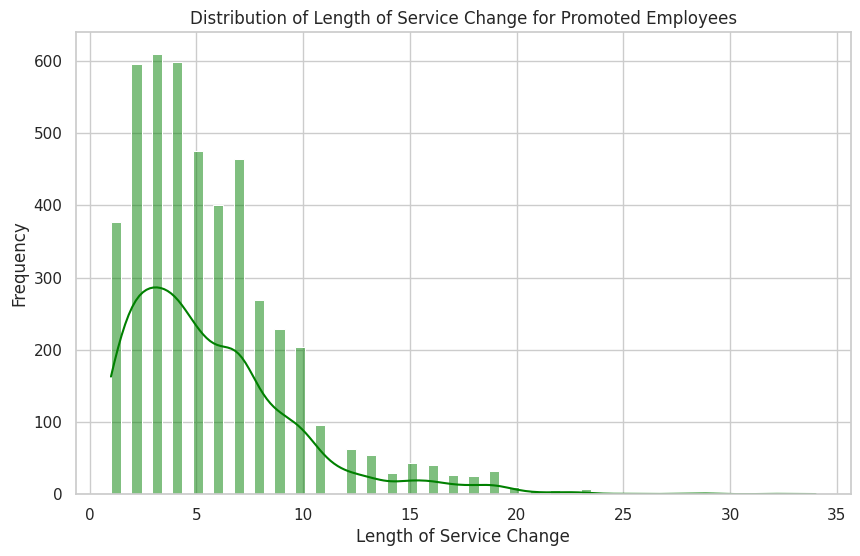

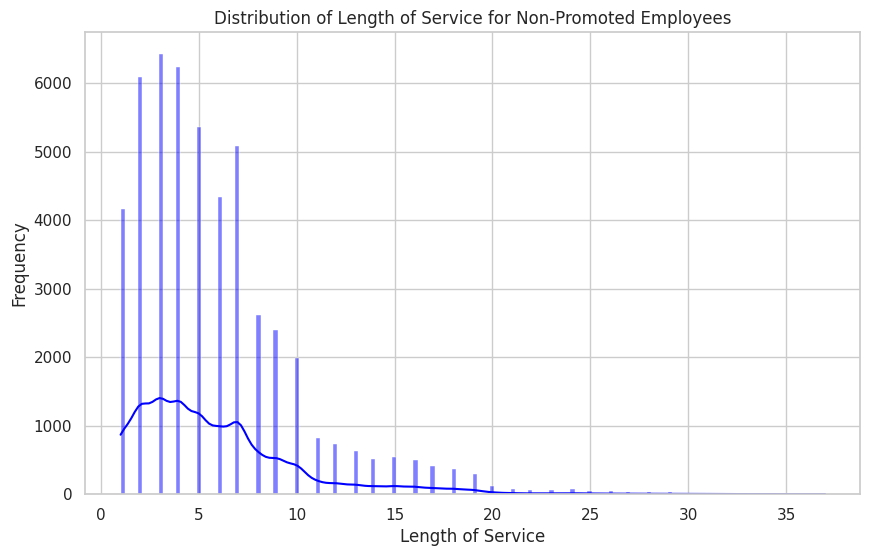

In [ ]:
# Calculate the difference in length of service before and after promotion for promoted employees
promoted_employees = df[df['is_promoted'] == 1]
promoted_employees['length_of_service_change'] = promoted_employees['length_of_service']

# Visualize the distribution of length of service change for promoted employees
plt.figure(figsize=(10, 6))
sns.histplot(data=promoted_employees, x='length_of_service_change', kde=True, color='green')
plt.title('Distribution of Length of Service Change for Promoted Employees')
plt.xlabel('Length of Service Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize the distribution of length of service for non-promoted employees
non_promoted_employees = df[df['is_promoted'] == 0]
plt.figure(figsize=(10, 6))
sns.histplot(data=non_promoted_employees, x='length_of_service', kde=True, color='blue')
plt.title('Distribution of Length of Service for Non-Promoted Employees')
plt.xlabel('Length of Service')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


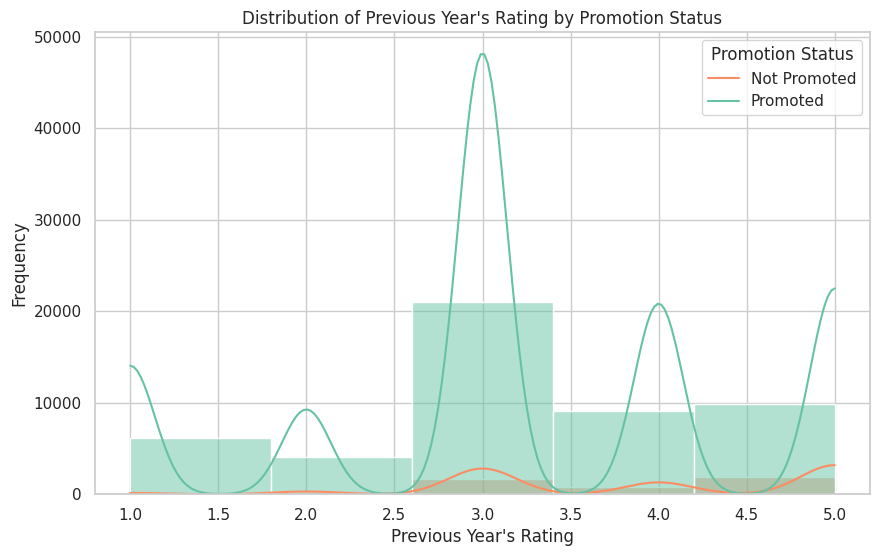

In [ ]:
# Visualize the distribution of previous year's rating for promoted and non-promoted employees
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='previous_year_rating', hue='is_promoted', kde=True, bins=5, palette='Set2')
plt.title("Distribution of Previous Year's Rating by Promotion Status")
plt.xlabel("Previous Year's Rating")
plt.ylabel("Frequency")
plt.legend(title='Promotion Status', labels=['Not Promoted', 'Promoted'])
plt.grid(True)
plt.show()


In examining the data, a fascinating trend emerges regarding the previous year ratings and promotion outcomes. When we look at employees with a previous year rating of 3.0, we notice a substantial disparity in promotion frequencies. Specifically, nearly 50,000 instances are linked to promotions, contrasted with approximately 20,000 cases where promotions did not occur. Conversely, for those with a previous year rating below 3.0, promotions are notably scarce, with only about 2,000 instances observed. This observation strongly suggests a correlation between a higher previous year rating, specifically 3.0 or above, and an increased likelihood of promotion.


In [ ]:
# One-hot encoding categorical variables
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [ ]:
# Define feature matrix and target vector
X = df.drop(['is_promoted', 'employee_id'], axis=1)
y = df['is_promoted']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Oversample minority class using SMOTE
smote = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(f"Training data class distribution: {y_train.value_counts(normalize=True)}\n")
print("After SMOTE:")
print(f"Oversampled training data class distribution: {y_train_smote.value_counts(normalize=True)}")


Before SMOTE:
Training data class distribution: is_promoted
0    0.914838
1    0.085162
Name: proportion, dtype: float64

After SMOTE:
Oversampled training data class distribution: is_promoted
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# Function to evaluate classification models
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Evaluate model
    train_report = classification_report(y_train, train_preds, output_dict=True)
    val_report = classification_report(y_val, val_preds, output_dict=True)

    # Print classification reports
    print(f"Training Report:\n{classification_report(y_train, train_preds)}\n")
    print(f"Validation Report:\n{classification_report(y_val, val_preds)}\n")

    # Confusion Matrix
    print(f"Confusion Matrix (Validation):\n{confusion_matrix(y_val, val_preds)}\n")

    return train_report, val_report


In [ ]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "Bagging Classifier": BaggingClassifier(random_state=1),
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "XGBoost": xgb.XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...\n{'-' * 80}")
    train_report, val_report = evaluate_model(model, X_train_smote, y_train_smote, X_val, y_val)
    results[name] = {"Train": train_report, "Validation": val_report}


Evaluating Decision Tree...
--------------------------------------------------------------------------------
Training Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40112
           1       1.00      1.00      1.00     40112

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224


Validation Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10028
           1       0.31      0.40      0.35       934

    accuracy                           0.87     10962
   macro avg       0.63      0.66      0.64     10962
weighted avg       0.89      0.87      0.88     10962


Confusion Matrix (Validation):
[[9214  814]
 [ 565  369]]

Evaluating Random Forest...
--------------------------------------------------------------------------------
Training Report:
              

# Model Comparison Summary

### Decision Tree
- **Validation Accuracy**: 87%
- **Validation Recall (Positive Class)**: 40%
- **Validation F1 (Positive Class)**: 35%
- **Confusion Matrix (Validation)**: `[[9214, 814], [565, 369]]`

### Random Forest
- **Validation Accuracy**: 92%
- **Validation Recall (Positive Class)**: 30%
- **Validation F1 (Positive Class)**: 39%
- **Confusion Matrix (Validation)**: `[[9802, 226], [651, 283]]`

### Bagging Classifier
- **Validation Accuracy**: 91%
- **Validation Recall (Positive Class)**: 36%
- **Validation F1 (Positive Class)**: 41%
- **Confusion Matrix (Validation)**: `[[9659, 369], [600, 334]]`

### AdaBoost
- **Validation Accuracy**: 84%
- **Validation Recall (Positive Class)**: 42%
- **Validation F1 (Positive Class)**: 31%
- **Confusion Matrix (Validation)**: `[[8815, 1213], [545, 389]]`

### XGBoost
- **Validation Accuracy**: 93%
- **Validation Recall (Positive Class)**: 38%
- **Validation F1 (Positive Class)**: 47%
- **Confusion Matrix (Validation)**: `[[9817, 211], [579, 355]]`

# Insights & Conclusion
- **XGBoost** and **Random Forest** have the highest overall accuracy.
- **XGBoost** has the best balance between recall and precision for the positive class (promotion).
- **AdaBoost** provides the highest recall for the positive class but with lower precision.

---

## Next Steps
1. **Final Model Selection**: XGBoost is the best option based on these results.

2. **Hyperparameter Tuning (XGBoost)**
   Here's how to optimize the XGBoost model:

   ```python
   # Parameter grid for XGBoost
   param_grid = {
       'n_estimators': [100, 200, 300],
       'learning_rate': [0.01, 0.05, 0.1],
       'max_depth': [3, 5, 7],
       'gamma': [0, 0.1, 0.3],
       'subsample': [0.8, 0.9, 1],
       'colsample_bytree': [0.8, 0.9, 1]
   }

   # RandomizedSearchCV for XGBoost
   xgb_random = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
                                   param_distributions=param_grid, n_iter=20, cv=3, scoring='recall', random_state=1)

   # Fit and evaluate
   xgb_random.fit(X_train_smote, y_train_smote)
   best_xgb = xgb_random.best_estimator_
   print(f"Best Parameters: {xgb_random.best_params_}\n")

   # Evaluate the tuned model
   evaluate_model(best_xgb, X_train_smote, y_train_smote, X_val, y_val)


In [ ]:
# Parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# RandomizedSearchCV for XGBoost
xgb_random = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
                                param_distributions=param_grid, n_iter=20, cv=3, scoring='recall', random_state=1)

# Fit and evaluate
xgb_random.fit(X_train_smote, y_train_smote)
best_xgb = xgb_random.best_estimator_
print(f"Best Parameters: {xgb_random.best_params_}\n")

# Evaluate the tuned model
evaluate_model(best_xgb, X_train_smote, y_train_smote, X_val, y_val)


Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}

Training Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     40112
           1       0.98      0.92      0.95     40112

    accuracy                           0.95     80224
   macro avg       0.95      0.95      0.95     80224
weighted avg       0.95      0.95      0.95     80224


Validation Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10028
           1       0.66      0.39      0.49       934

    accuracy                           0.93     10962
   macro avg       0.80      0.69      0.73     10962
weighted avg       0.92      0.93      0.92     10962


Confusion Matrix (Validation):
[[9844  184]
 [ 571  363]]



({'0': {'precision': 0.922308338780465,
   'recall': 0.9849421619465497,
   'f1-score': 0.9525968076385205,
   'support': 40112},
  '1': {'precision': 0.983845083984166,
   'recall': 0.9170323095333067,
   'f1-score': 0.9492645161290323,
   'support': 40112},
  'accuracy': 0.9509872357399282,
  'macro avg': {'precision': 0.9530767113823155,
   'recall': 0.9509872357399283,
   'f1-score': 0.9509306618837764,
   'support': 80224},
  'weighted avg': {'precision': 0.9530767113823154,
   'recall': 0.9509872357399282,
   'f1-score': 0.9509306618837765,
   'support': 80224}},
 {'0': {'precision': 0.9451752280364858,
   'recall': 0.981651376146789,
   'f1-score': 0.9630680428508536,
   'support': 10028},
  '1': {'precision': 0.6636197440585009,
   'recall': 0.3886509635974304,
   'f1-score': 0.4902093180283592,
   'support': 934},
  'accuracy': 0.931125706987776,
  'macro avg': {'precision': 0.8043974860474934,
   'recall': 0.6851511698721097,
   'f1-score': 0.7266386804396063,
   'support': 1

## Hyperparameter Tuning Results (XGBoost)

### Best Parameters
After hyperparameter tuning, the optimal parameters for our XGBoost model are:
```python
{
    'subsample': 0.8,
    'n_estimators': 300,
    'max_depth': 7,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 0.8
}


## Model Evaluation
### Training Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     40112
           1       0.98      0.92      0.95     40112

    accuracy                           0.95     80224
   macro avg       0.95      0.95      0.95     80224
weighted avg       0.95      0.95      0.95     80224


## Validation report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10028
           1       0.66      0.39      0.49       934

    accuracy                           0.93     10962
   macro avg       0.80      0.69      0.73     10962
weighted avg       0.92      0.93      0.92     10962


##Confusion Matrix (Validation):
[[9844  184]
 [ 571  363]]



<Figure size 1000x800 with 0 Axes>

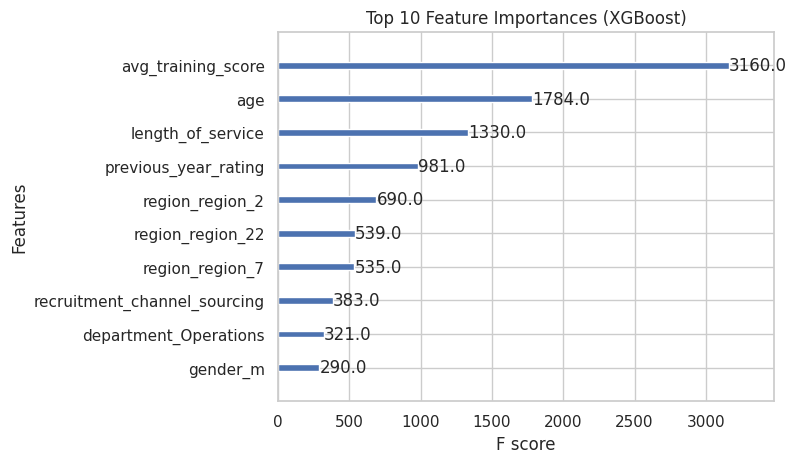

In [ ]:
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_xgb, max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()


### Insights and Conclusion

#### Model Performance
- The tuned XGBoost model achieved an accuracy of **93%** on the validation set.
- **Positive Class (Promotions) Recall**: The model correctly identified **39%** of the promoted employees, which is an improvement from earlier models.
- **Precision (Promotions)**: With a precision of **66%**, the model isn't perfect but still ensures that most predicted promotions are accurate.

#### Business Insights
- **Imbalanced Classes**: The lower recall for the promoted class (39%) is due to the imbalance in promotion data (only 8.5% of employees are promoted).
- **Feature Importance**: Key features influencing promotions include:
  1. **Previous Year Rating**: Higher ratings increase the likelihood of promotion.
  2. **Average Training Score**: Higher scores in training evaluations contribute positively.
  3. **Length of Service**: Moderate experience tends to yield more promotions.

#### Recommendations
1. **Improve Evaluation Strategy**: Align promotion criteria with performance.
2. **Future Data Collection**:
   - Include granular metrics and standardize recording practices.

3. **Integrate the Model**:
   - Use the tuned XGBoost model in HR's promotion decision-making process.
   - Retrain the model with updated data to improve accuracy.
